Dervla Gargan - 22346279
Mark Langtry - 22340475
Amy McMahon - 22346619

Code executed without errors :)

**Links used**

Importing librarys

In [48]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import deque

Setting Up environment

In [49]:
env = gym.make('MountainCar-v0', render_mode='human')
env.reset()

(array([-0.51963544,  0.        ], dtype=float32), {})

Env variables

In [50]:
space =  env.observation_space
actions = env.action_space
EPSILON = 1
NUM_ACTIONS = actions.n
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.1
NUM_EPISODES = 10
rewards_per_episode= []
EPSILON = 1
EPSILON_DECAY = 2/NUM_EPISODES


Create model

In [51]:
state_shape = env.observation_space.shape

model = tf.keras.Sequential([
        tf.keras.layers.Dense(24, activation='relu', input_shape=state_shape),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(NUM_ACTIONS)
])

Segmenting velocity and position 

In [52]:
position = np.linspace(space.low[0], space.high[0], 20)
velocity = np.linspace(space.low[1], space.high[1], 20)

q_values = np.zeros((len(position), len(velocity), NUM_ACTIONS))

In [53]:
# def select_action(state):
#     if np.random.random() < EPSILON:
#         action = np.random.randint(NUM_ACTIONS)
#     else:
#         action = np.argmax(model.predict(state[np.newaxis], verbose=0)[0])

#     return action
                

In [54]:
def epsilon_greedy_policy(state, epsilon=0):
    print(state)
    if np.random.rand() >= epsilon:
        return np.random.randint(n_outputs)
    else:
        state_array = state[0]
        Q_values = model.predict(state_array[np.newaxis], verbose=0)[0]

        return Q_values.argmax()

In [55]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_buffer.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

In [56]:
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0
batch_size = 32

In [57]:
replay_buffer = deque(maxlen=400)

def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)
    ]  # [states, actions, rewards, next_states, dones, truncateds]

In [58]:
optimize = tf.keras.optimizers.Nadam(learning_rate=1e-2)
lossFunc = tf.keras.losses.mean_squared_error

def training(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    min_next_Q_values = next_Q_values.min(axis=1)
    runs = 1.0 - (dones)
    target_Q_values = rewards + runs * discount_factor * min_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    

In [59]:
for episode in range(300):
    obs = env.reset()
    for step in range(200):
        epsilon = 0.5
        obs, reward, done, info  = play_one_step(env,obs, epsilon)
        if done:
            break
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}",
          end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

(array([-0.5122243,  0.       ], dtype=float32), {})


c:\Users\admcm\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ValueError: too many values to unpack (expected 4)

In [ ]:
def train(EPSILON, EPSILON_DECAY):
    state = env.reset()[0]
    state_position = np.digitize(state[0], position)
    state_velocity = np.digitize(state[1], velocity)

    goal = False

    rewards = 0

    while not goal and rewards > -1000:
        action = select_action(state)
        next_state, reward, goal, _, _ = env.step(action)
        next_state_position = np.digitize(next_state[0], position)
        next_state_velocity = np.digitize(next_state[1], velocity)
        max_q_value_next_state = np.max(q_values[next_state_position][next_state_velocity])
        q_values[state_position][state_velocity][action] += LEARNING_RATE * (reward + DISCOUNT_FACTOR * 
                                max_q_value_next_state - q_values[state_position][state_velocity][action])
        state_position = next_state_position
        state_velocity = next_state_velocity

        rewards += reward

    rewards_per_episode.append(rewards)
    NEW_EPSILON = max(EPSILON - EPSILON_DECAY, 0)
    return NEW_EPSILON
    



In [ ]:
# for episode in range(NUM_EPISODES):
#     EPSILON = train(EPSILON, EPSILON_DECAY)

# env.close()

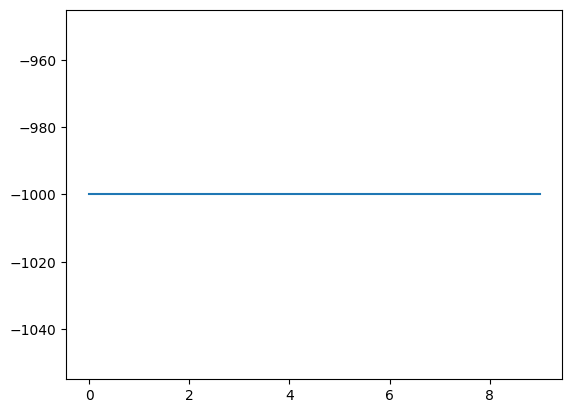

In [ ]:
mean_rewards = np.zeros(NUM_EPISODES)
for t in range(NUM_EPISODES):
    mean_rewards[t] = np.mean(rewards_per_episode[max(0, t-100):(t+1)])
plt.plot(mean_rewards)